## State vectors:

Import required libraries:

Importing all required libraries at in the first cell is usually a best practice!!
note: we can just ignore (if any) numpy deprecation warnings on during a first run of imports in a kernel. 

In [2]:
# Diable warnings (if any):
import warnings
warnings.filterwarnings(action='ignore')

from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import state_fidelity


In [12]:
sv0 = Statevector.from_label('0') # |0>, up
sv1 = Statevector.from_label('1') # |1>, down

sv_plus = Statevector.from_label('+') # |+>, out
sv_minus = Statevector.from_label('-') # |->, in

sv_plus_i = Statevector.from_label('r') # |+i>, right
sv_minus_i = Statevector.from_label('l')  # |-i>, left

# above comment-descriptions are based on Bloch's sphere!
# help(Statevector.from_label)

## Projection of $\beta$ on $\alpha$:
Probablity of 𝛽 to collapse over 𝛼 during a measurement.

In [13]:
# state_fidelity(𝛼, 𝛽)

print(state_fidelity(sv0, sv0)) # ==> 1.0 e.g: 100%
print(state_fidelity(sv0, sv1)) # ==> 0.0 e.g: 0% (orthogonal)


1.0
0.0


## Create quantum circuit with n qubit(s):

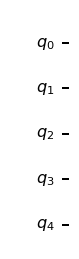

In [14]:
n = 5 # we will create 5 different quantum circuits different gate in each circuit

# let's create a list. So that, we can easily refer to out circuit later on.
qubit = {}
for qubit_id in range(n):
    qubit[f'q{qubit_id}'] = qubit_id

q5_circuit = QuantumCircuit(n) # circuit with 5 qubits

q5_circuit.draw('mpl') # mat plot lib?!?

### Let's add a gate to our circuit for a sigle qubit:
- We aren't at multi-qubit discussion yet!
- Pauli-X operations: Flip a qubit

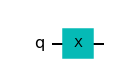

In [15]:
q1_circuit = QuantumCircuit(1)
q1_circuit.x(qubit=qubit['q0'])
q1_circuit.draw('mpl')

In [16]:
print('Before X gate:')
print('sv0:', sv0)
print('sv1:', sv1)

sv0 = sv0.evolve(q1_circuit)
sv1 = sv1.evolve(q1_circuit)

print('After X gate:')
print('sv0:', sv0)
print('sv1:', sv1)

Before X gate:
sv0: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
sv1: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
After X gate:
sv0: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
sv1: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


- Pauli-Z operations: Flip a phase

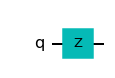

In [17]:
q1_circuit = QuantumCircuit(1)
q1_circuit.z(qubit=qubit['q0'])
q1_circuit.draw('mpl')

In [18]:
print('Before Z gate:')
print('sv_plus:', sv_plus)
print('sv_minus:', sv_minus)

sv_plus = sv_plus.evolve(q1_circuit)
sv_minus = sv_minus.evolve(q1_circuit)

print('After Z gate:')
print('sv_plus:', sv_plus)
print('sv_minus:', sv_minus)

Before Z gate:
sv_plus: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
sv_minus: Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
After Z gate:
sv_plus: Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
sv_minus: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


- Similarly, Pauli-Y (flip qubit & phase), Hadamand-H  (creates superposition), and S (adds 90-degree to phase) gates can be added!

## Quantum Circuit using registers

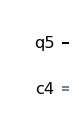

In [12]:
q_reg = QuantumRegister(1)
c_reg = ClassicalRegister(1)
q_circuit = QuantumCircuit(q_reg, c_reg)

q_circuit.draw('mpl')

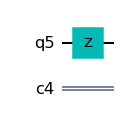

In [13]:
q_circuit.z(q_reg[0])

q_circuit.draw('mpl')

## Let's see result in a State Vector simulator

In [14]:
sv_backend = Aer.get_backend(name='statevector_simulator')

result = execute(experiments=q_circuit, backend=sv_backend).result()

In [15]:
state_vector = result.get_statevector()

state_vector

array([ 1.+0.j, -0.+0.j])